In [106]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [107]:
# Train data check
df = pd.read_csv("/home/hsuehhan.wu@rakuten.com/FinalProject/loan_train_data.csv")
#df.head(5)
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [147]:
# Seeing the non-numerical values first and look at frequency distribution to see whether they make semse or not.
df['Property_Area'].value_counts()

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64

<Axes: >

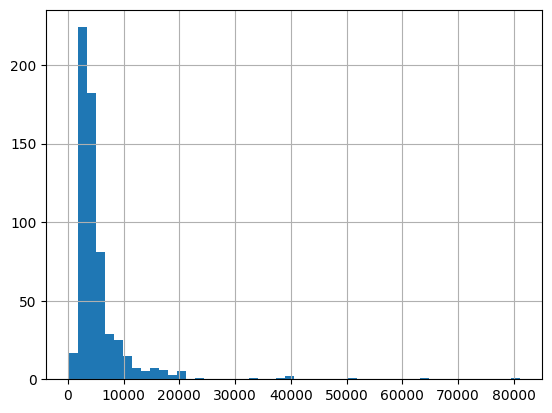

In [109]:
# Distribution analysis
df['ApplicantIncome'].hist(bins=50)

<Axes: >

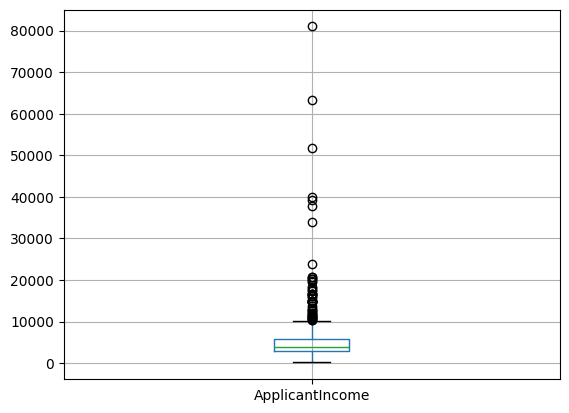

In [148]:
# This confirms the presence of a lot of outliers/extreme values. 
# The reason can be attributed to the income disparity in the society.
df.boxplot(column='ApplicantIncome')

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

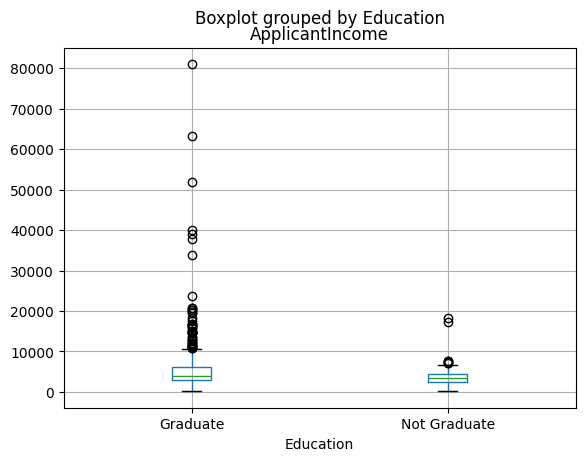

In [111]:
# Part of the results might be resulted from different education level 
df.boxplot(column='ApplicantIncome', by = 'Education')

# Based on the result, there are a higher number of graduates with very high incomes, 
# so the outliers may have strong relationship with the education level.

<Axes: >

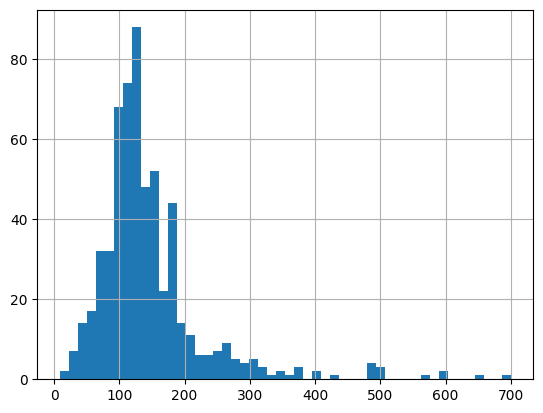

In [112]:
# This time we would like to see the distribution of the loan amount.
df['LoanAmount'].hist(bins=50)

# Again, some extreme values appear. So applicantIncome and loanAmount require some amount of data wrangling.

<Axes: >

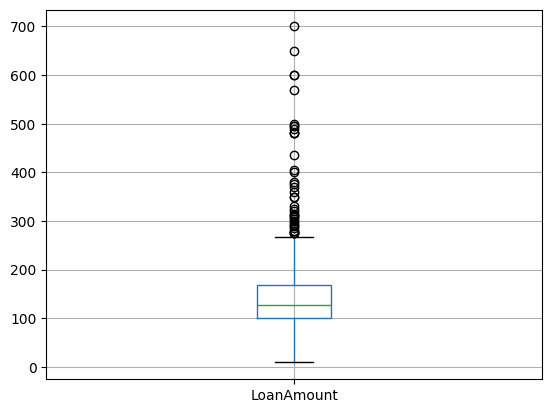

In [113]:
df.boxplot(column='LoanAmount')

In [149]:
# Categorical variable analysis
# Using the pivot table to look at the chances of getting a loan based a valid credit history. 
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
Credit_History
0.0     89
1.0    525
Name: count, dtype: int64

Probility of getting loan for each Credit History class:
Empty DataFrame
Columns: []
Index: []


Text(0.5, 1.0, 'Probability of getting loan by credit history')

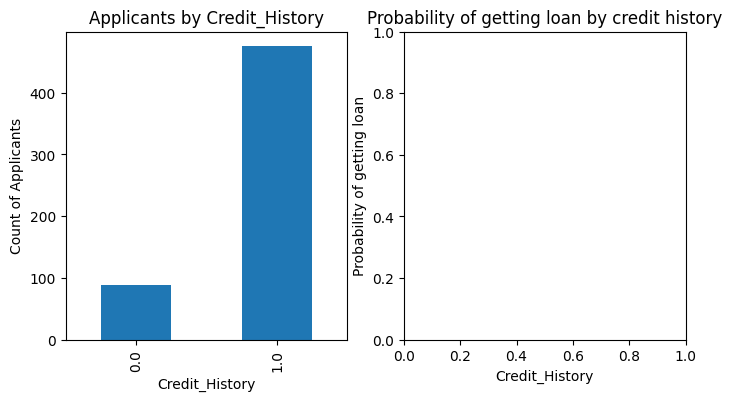

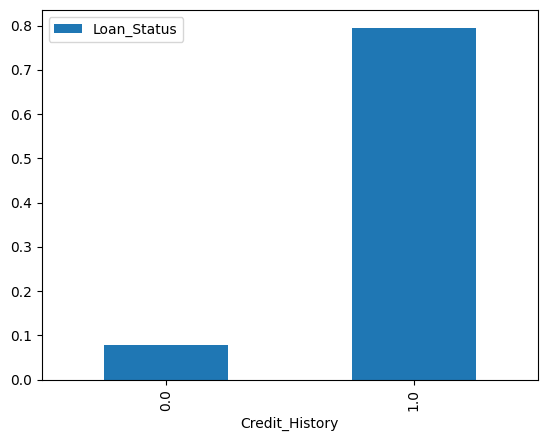

In [115]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

<Axes: xlabel='Credit_History'>

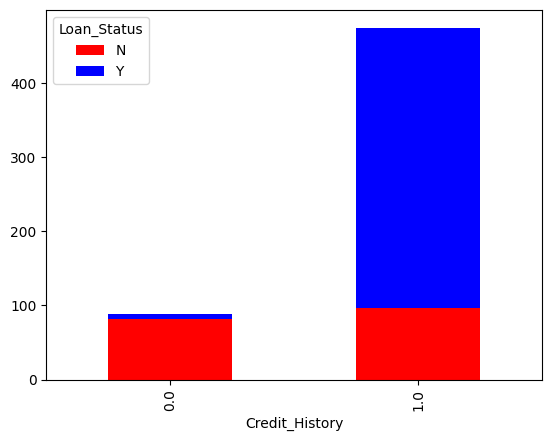

In [116]:
# Some error with the pivot table above, so we use the stacked chart instead.
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history.

In [118]:
# check missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

/tmp/ipykernel_54585/1977403596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [141]:
print(df['Self_Employed'].value_counts())
# Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. 
df['Self_Employed'].fillna('No',inplace=True)

Self_Employed
0    532
1     82
Name: count, dtype: int64


/tmp/ipykernel_54585/469184842.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna('No',inplace=True)


<Axes: >

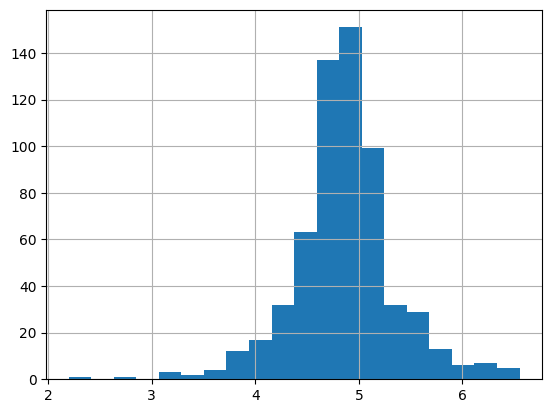

In [120]:
# Some extreme values are practically possible. i.e. some people might apply for high value loans due to specific needs. 
# Instead of treating them as outliers, here using a log transformation to nullify their effect and make the data normal.
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<Axes: >

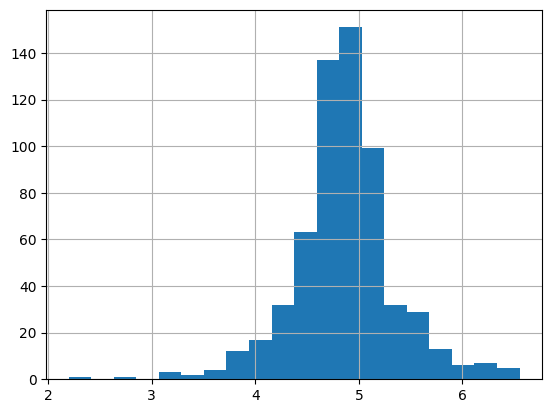

In [121]:
# Some applicants may have lower income but strong support Co-applicants.
# It might be a good idea to combine both incomes as total income and take a log transformation as well.
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [142]:
# Using Mode function to get the value that appears most often and use that to fill out the missing value.
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

1


/tmp/ipykernel_54585/1084215264.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipykernel_54585/1084215264.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [123]:
# Sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories.
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [134]:
# Building a predictive model

#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    #Perform k-fold cross-validation with 5 folds (To see the model's performance on unseen data)
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(list(data.columns)):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
        
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 


In [143]:
# Logistic Regression : find the relationships between two data factors
# Based on previous categorical analysis, we supposed applicants having a credit history have high possibility to get a loan.

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var, outcome_var)

#output = pd.DataFrame({'Loan_ID': df.Loan_ID, 'Loan_Status': predictions})
#output.to_csv('/home/hsuehhan.wu@rakuten.com/FinalProject/submission.csv', index=False)

Accuracy : 80.945%
Cross-Validation Score : 75.000%


In [151]:
# Decision Tree Classifier: The type of algorithm that uses a tree-like structure to classify instances based on their feature values. 
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 75.000%


In [137]:
# We can try different combination of variables
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 55.000%


In [138]:
# Random Forest Classifier: A meta estimator that fits a number of decision tree classifiers on various 
# sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

# The data and model might be exactly same used from the real estate, so the 100% accuracy might be possible.

Accuracy : 100.000%
Cross-Validation Score : 86.667%


In [130]:
# The result of the case above might be overfitting and can be resolved in two ways:
# 1.Reducing the number of predictors
# 2.Tuning the model parameters

# Create a series to see the feature importances first:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.265164
TotalIncome_log     0.263492
LoanAmount_log      0.236382
Dependents          0.053108
Property_Area       0.046382
Loan_Amount_Term    0.041925
Married             0.025733
Education           0.024299
Gender              0.022020
Self_Employed       0.021496
dtype: float64


In [153]:
# Let’s use the top 5 variables for creating a model. 
# Also, we will modify the parameters of random forest model a little bit.
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=3)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History',]
classification_model(model, df,predictor_var, outcome_var)

Accuracy : 82.248%
Cross-Validation Score : 75.000%
